In [20]:
import pandas as pd
import numpy as np
from scipy import stats 
from scipy.stats import shapiro, anderson, kstest,jarque_bera, normaltest , levene,bartlett

In [21]:
train = pd.read_csv('./datasets/전처리완료/코스피_train_power.csv',index_col=0)
train['target_1'] = train['target_1'].astype(int)
train['target_2'] = train['target_2'].astype(int)
train['target_3'] = train['target_3'].astype(int)
수치형_col = train.select_dtypes(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3719 entries, 0 to 3718
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_1               3719 non-null   int32  
 1   target_2               3719 non-null   int32  
 2   target_3               3719 non-null   int32  
 3   회계년도                   3719 non-null   int64  
 4   회사명                    3719 non-null   object 
 5   거래소코드                  3719 non-null   int64  
 6   산업군                    3719 non-null   object 
 7   차입금의존도                 3719 non-null   float64
 8   부채비율                   3719 non-null   float64
 9   순운전자본비율                3719 non-null   float64
 10  총자본정상영업이익률             3719 non-null   float64
 11  자기자본순이익률               3719 non-null   float64
 12  매출액총이익률                3719 non-null   float64
 13  금융비용부담률                3719 non-null   float64
 14  자본금회전률                 3719 non-null   float64
 15  유형자산

---
## 정규성 검정
---

In [22]:
# 정규성 검정을 하나의 함수로
def normal_test(test_name,x):
    normal = []
    notnormal = []
    if test_name == 'shapiro':
        for var in x.columns :
            stat, p  = shapiro(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'anderson':
        for var in x.columns :
            result  = anderson(x[var].values,dist='norm')
            normality = 0
            for i in range(len(result.critical_values)):
                # sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    normality +=1
                else :
                    normality +=0
            if normality > 2.5 :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'kstest':
        for var in x.columns :
            stat,p  = kstest(x[var].values, "norm")
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    
    elif test_name == 'jarque_bera':
        for var in x.columns :
            stat,p  = jarque_bera(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
                
    elif test_name == 'normaltest':
        for var in x.columns :
            stat, p  = normaltest(x[var].values)
            alpha = 0.05
            if p > alpha :
                normal.append(var)
            else :
                notnormal.append(var)
    else:
        pass
    return pd.DataFrame(normal, columns = ['normal']),pd.DataFrame(notnormal, columns = ['notnormal'])


In [23]:
normal_test('shapiro',수치형_col)

(Empty DataFrame
 Columns: [normal]
 Index: [],
                 notnormal
 0                  차입금의존도
 1                    부채비율
 2                 순운전자본비율
 3              총자본정상영업이익률
 4                자기자본순이익률
 5                 매출액총이익률
 6                 금융비용부담률
 7                  자본금회전률
 8                 유형자산회전율
 9                 재고자산회전률
 10                자기자본회전률
 11                타인자본회전률
 12                 총자본회전률
 13                  이익잉여금
 14                 외국인지분율
 15                 대주주지분율
 16                유형자산증가율
 17                 매출액증가율
 18                자기자본증가율
 19                 총자본증가율
 20              정상영업이익증가율
 21                     업력
 22                누적수익성비율
 23                  이자부담률
 24                 부채상환계수
 25              현금흐름 대 자산
 26             현금흐름 대 매출액
 27                    TMD
 28                 시총/총자산
 29               EBIT/총자산
 30               당기전기영업손익
 31                 FINDEP
 32              EBITDA마진율
 33                 PBR변화율
 34    

In [24]:
normal_test('kstest',수치형_col)

(    normal
 0  순운전자본비율
 1   자본금회전률
 2  타인자본회전률
 3   총자본회전률,
                 notnormal
 0                  차입금의존도
 1                    부채비율
 2              총자본정상영업이익률
 3                자기자본순이익률
 4                 매출액총이익률
 5                 금융비용부담률
 6                 유형자산회전율
 7                 재고자산회전률
 8                 자기자본회전률
 9                   이익잉여금
 10                 외국인지분율
 11                 대주주지분율
 12                유형자산증가율
 13                 매출액증가율
 14                자기자본증가율
 15                 총자본증가율
 16              정상영업이익증가율
 17                     업력
 18                누적수익성비율
 19                  이자부담률
 20                 부채상환계수
 21              현금흐름 대 자산
 22             현금흐름 대 매출액
 23                    TMD
 24                 시총/총자산
 25               EBIT/총자산
 26               당기전기영업손익
 27                 FINDEP
 28              EBITDA마진율
 29                 PBR변화율
 30                 ROA변화율
 31             현금흐름/총부채비율
 32           영업현금흐름-단기차입금
 33  abs(영업현금흐름-당기순이익

---
## 등분산성검정
---

In [25]:
train = pd.read_csv('./datasets/전처리완료/코스피_train_power.csv',index_col=0)
train['target_1'] = train['target_1'].astype(int)
train['target_2'] = train['target_2'].astype(int)
train.info()
수치형_col = train.select_dtypes(float)
col_int = 수치형_col.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3719 entries, 0 to 3718
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target_1               3719 non-null   int32  
 1   target_2               3719 non-null   int32  
 2   target_3               3719 non-null   float64
 3   회계년도                   3719 non-null   int64  
 4   회사명                    3719 non-null   object 
 5   거래소코드                  3719 non-null   int64  
 6   산업군                    3719 non-null   object 
 7   차입금의존도                 3719 non-null   float64
 8   부채비율                   3719 non-null   float64
 9   순운전자본비율                3719 non-null   float64
 10  총자본정상영업이익률             3719 non-null   float64
 11  자기자본순이익률               3719 non-null   float64
 12  매출액총이익률                3719 non-null   float64
 13  금융비용부담률                3719 non-null   float64
 14  자본금회전률                 3719 non-null   float64
 15  유형자산

In [26]:
def homoscedasticity_test(df, col,tool):
        dict_1 = {"변수" : [], "p_val" : [], "T" : [] }
        dict_2 = {"변수" : [], "p_val" : [], "T" : [] }
        if tool == "levene":
                for i in col:
                        T, p_val =levene(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict_1["변수"].append(i)
                        dict_1["p_val"].append(p_val)
                        dict_1["T"].append(T)

                return  pd.DataFrame(dict_1)

        if tool == "bartlett":
                for i in col:
                        T, p_val =bartlett(df[df['target_3']==1][i], df[df['target_3']==0][i]) 
                        dict_2["변수"].append(i)
                        dict_2["p_val"].append(p_val)
                        dict_2["T"].append(T)

                        
                return pd.DataFrame(dict_2) 


In [27]:
## 정규성을 따를때 등분산성 검정
bartlett = homoscedasticity_test(수치형_col,col_int,"bartlett")

bartlett[bartlett['p_val']>0.05]
#

c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2507: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2507: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)


,변수,p_val,T
8,자본금회전률,0.243720,1.358945
12,타인자본회전률,0.194237,1.685186
13,총자본회전률,0.389868,0.739355
15,외국인지분율,0.348364,0.879406
22,업력,0.616394,0.250968
23,누적수익성비율,0.516957,0.419961
37,영업현금흐름-단기차입금,0.070660,3.267624
38,abs(영업현금흐름-당기순이익)/매출액,0.058280,3.585679


In [28]:
# 정규성을 따르지 않을때 등분산성 검정
levene = homoscedasticity_test(수치형_col, col_int,"levene")

등분산변수 = levene[levene['p_val']>0.05]['변수'].to_list()
이분산변수 = levene[levene['p_val']<0.05]['변수'].to_list()

levene[levene['p_val']>0.05]

c:\Users\msi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:2643: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


,변수,p_val,T
8,자본금회전률,0.253096,1.306536
12,타인자본회전률,0.098026,2.738752
13,총자본회전률,0.447109,0.578094
15,외국인지분율,0.146225,2.112077
22,업력,0.535556,0.383910
23,누적수익성비율,0.372673,0.794924
25,부채상환계수,0.764470,0.089783
28,TMD,0.262265,1.257142
32,FINDEP,0.278412,1.175168
37,영업현금흐름-단기차입금,0.433299,0.614098


---
##t-test
---

In [29]:
import scipy.stats as stats

def t_test(df,col,tool,alpha=0.05):
    dict_1 = {'변수':[],'p_val':[],'t-val':[]}
    dict_2 = {'변수':[],'p_val':[],'t-val':[]}
    if tool == 'student':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i])
            dict_1["변수"].append(i)
            dict_1["p_val"].append(p_value)
            dict_1["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_1)
        return list

    if tool == 'welch':
        for i in col:
            t_statistic, p_value = stats.ttest_ind(df[df['target_3']==1][i], df[df['target_3']==0][i],equal_var=False)
            dict_2["변수"].append(i)
            dict_2["p_val"].append(p_value)
            dict_2["t-val"].append(t_statistic)

            list = pd.DataFrame(dict_2)
        return list

In [30]:
## 등분산성 t-test
student = t_test(수치형_col,등분산변수,'student')
student[student['p_val']<0.05]

student_변수  = student[student['p_val']<0.05]['변수'].to_list()
student[student['p_val']<0.05]

,변수,p_val,t-val
0,자본금회전률,4.052950e-14,-7.588944
1,타인자본회전률,4.848088e-33,-12.091485
2,총자본회전률,9.755219e-14,-7.472513
3,외국인지분율,2.373080e-08,-5.594435
5,누적수익성비율,1.401313e-45,-14.364714
7,TMD,3.330900e-16,8.197945


In [31]:
## 이분산성 t-test
welch = t_test(수치형_col,이분산변수,'welch')


welch_변수  = welch[welch['p_val']<0.05]['변수'].to_list()
welch[welch['p_val']<0.05]

,변수,p_val,t-val
2,순운전자본비율,2.759367e-06,-5.469590
3,총자본정상영업이익률,4.879028e-12,-9.739631
4,자기자본순이익률,9.099786e-07,-5.820683
5,매출액총이익률,9.473163e-05,-4.348977
6,금융비용부담률,1.834048e-09,7.777260
9,자기자본회전률,1.256148e-03,-3.477124
10,이익잉여금,1.639244e-04,-4.169859
11,대주주지분율,1.945992e-02,-2.436112
13,매출액증가율,3.223928e-07,-6.141509
14,자기자본증가율,2.748130e-02,-2.290500


In [32]:
t_검정변수 = student_변수 + welch_변수
t_검정변수

['자본금회전률',
 '타인자본회전률',
 '총자본회전률',
 '외국인지분율',
 '누적수익성비율',
 'TMD',
 '순운전자본비율',
 '총자본정상영업이익률',
 '자기자본순이익률',
 '매출액총이익률',
 '금융비용부담률',
 '자기자본회전률',
 '이익잉여금',
 '대주주지분율',
 '매출액증가율',
 '자기자본증가율',
 '총자본증가율',
 '정상영업이익증가율',
 '현금흐름 대 자산',
 '현금흐름 대 매출액',
 '시총/총자산',
 'EBIT/총자산',
 '당기전기영업손익',
 'EBITDA마진율',
 'ROA변화율',
 '현금흐름/총부채비율',
 'abs(영업현금흐름-당기순이익)/매출액']

---
## 다중공선성 상관계수 확인
---

In [33]:
train = pd.read_csv('./datasets/전처리완료/코스피_train_power.csv',index_col=0)
test = pd.read_csv('./datasets/전처리완료/코스피_test_power.csv',index_col=0)
명목형_col = [['회사명','거래소코드','회계년도','산업군','target_1','target_2','target_3']]

수치형_col = train[t_검정변수]
수치형_col 

,자본금회전률,타인자본회전률,총자본회전률,외국인지분율,누적수익성비율,TMD,순운전자본비율,총자본정상영업이익률,자기자본순이익률,매출액총이익률,...,정상영업이익증가율,현금흐름 대 자산,현금흐름 대 매출액,시총/총자산,EBIT/총자산,당기전기영업손익,EBITDA마진율,ROA변화율,현금흐름/총부채비율,abs(영업현금흐름-당기순이익)/매출액
0,-1.679759,-1.763015,-1.239144,0.362238,-2.117066,1.075129,-1.606157,-0.996496,-0.847977,-0.182209,...,0.173284,0.225103,0.834616,-0.751030,-0.764909,-0.546656,1.487882,0.101456,-0.192701,1.744653
1,-1.823686,-1.962984,-1.440408,0.321320,-1.247838,0.896428,-1.737732,-0.929993,-1.347658,-0.074401,...,0.091032,-0.365092,-0.032639,-0.413220,-0.947341,-0.364046,1.414803,-0.271356,-0.472799,1.961803
2,-1.722516,-1.782290,-1.013522,-0.168381,-1.466113,1.344906,-1.209130,0.034438,-1.594881,0.307519,...,1.826400,-0.017479,0.303298,-0.932655,-0.860560,-0.184799,2.449553,-0.025626,-0.350525,1.942400
3,-1.599467,-1.457042,-0.607482,0.597449,-1.156163,0.059424,-0.091574,1.831709,9.614727,0.961677,...,0.531796,1.802674,2.395986,0.600189,2.550358,-0.005840,3.875245,0.535958,0.425593,-0.180391
4,-1.485623,-1.026909,-0.308218,0.827621,-0.887114,-0.188385,-0.087532,2.962144,3.025735,1.154185,...,0.089403,3.662642,4.024357,0.746916,1.425556,0.152903,4.112309,-0.069238,1.206735,1.888678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714,0.278270,-1.069298,-0.365536,-0.949422,-0.756535,1.549894,-1.060849,-1.228881,-1.124929,-1.332871,...,-2.788993,-0.932854,-0.833044,-1.363872,-1.281608,-1.604598,-0.792283,-2.266585,-0.739664,0.585486
3715,-0.141855,-2.026290,-1.440408,-0.535315,-1.660187,2.290506,-0.750430,-1.329276,-3.510169,-1.486827,...,-0.055903,-0.342984,-0.107741,-2.143862,-4.009971,-2.898096,-1.174081,-0.525923,-0.492410,2.332498
3716,-2.118516,-2.296864,-1.318130,-1.726263,-2.992086,2.263793,-1.171236,-4.876293,-0.496633,-1.554192,...,-2.433763,-1.556754,-1.486171,-1.884787,-5.680833,-1.176343,-5.469537,-17.347021,-0.844255,2.338086
3717,-2.076007,-2.320774,-1.200382,1.947692,-2.676975,-0.730767,-1.615352,-1.579270,-0.496633,-0.425367,...,0.079713,-3.099515,-3.206274,1.678092,9.515751,-0.270987,-1.588889,0.729723,-1.967512,2.337449


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(수치형_col.values, i) for i in range(수치형_col.shape[1])]
vif["features"] = 수치형_col.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,79.462839,TMD
1,45.297296,시총/총자산
2,27.332590,타인자본회전률
3,22.314961,총자본회전률
4,8.280758,현금흐름 대 자산
5,7.018790,현금흐름 대 매출액
6,6.841781,현금흐름/총부채비율
7,6.783498,자기자본회전률
8,5.286303,총자본정상영업이익률
9,4.237468,EBIT/총자산


In [35]:
drop_col = ['TMD','총자본회전률']

In [36]:
# ESD후윈 = ['총자본순이익률','당기순이익','로그부채','영업손익','로그이자비용','자본','EBIT/총자산','현금흐름 대 자산']

In [37]:
# ESD만 = ['경영자본순이익률','로그부채','로그시가총액','총자본순이익률']

In [38]:
##
수치형_col = 수치형_col.drop(drop_col,axis=1)

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(수치형_col.values, i) for i in range(수치형_col.shape[1])]
vif["features"] = 수치형_col.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,7.561679,현금흐름 대 자산
1,7.000431,현금흐름 대 매출액
2,6.183552,현금흐름/총부채비율
3,5.262129,총자본정상영업이익률
4,4.212257,EBIT/총자산
5,4.112261,타인자본회전률
6,3.424653,이익잉여금
7,3.381591,당기전기영업손익
8,3.181161,누적수익성비율
9,2.988221,EBITDA마진율


C:\Users\msi\AppData\Local\Temp\ipykernel_13660\2754315082.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Correlation of Features'}>

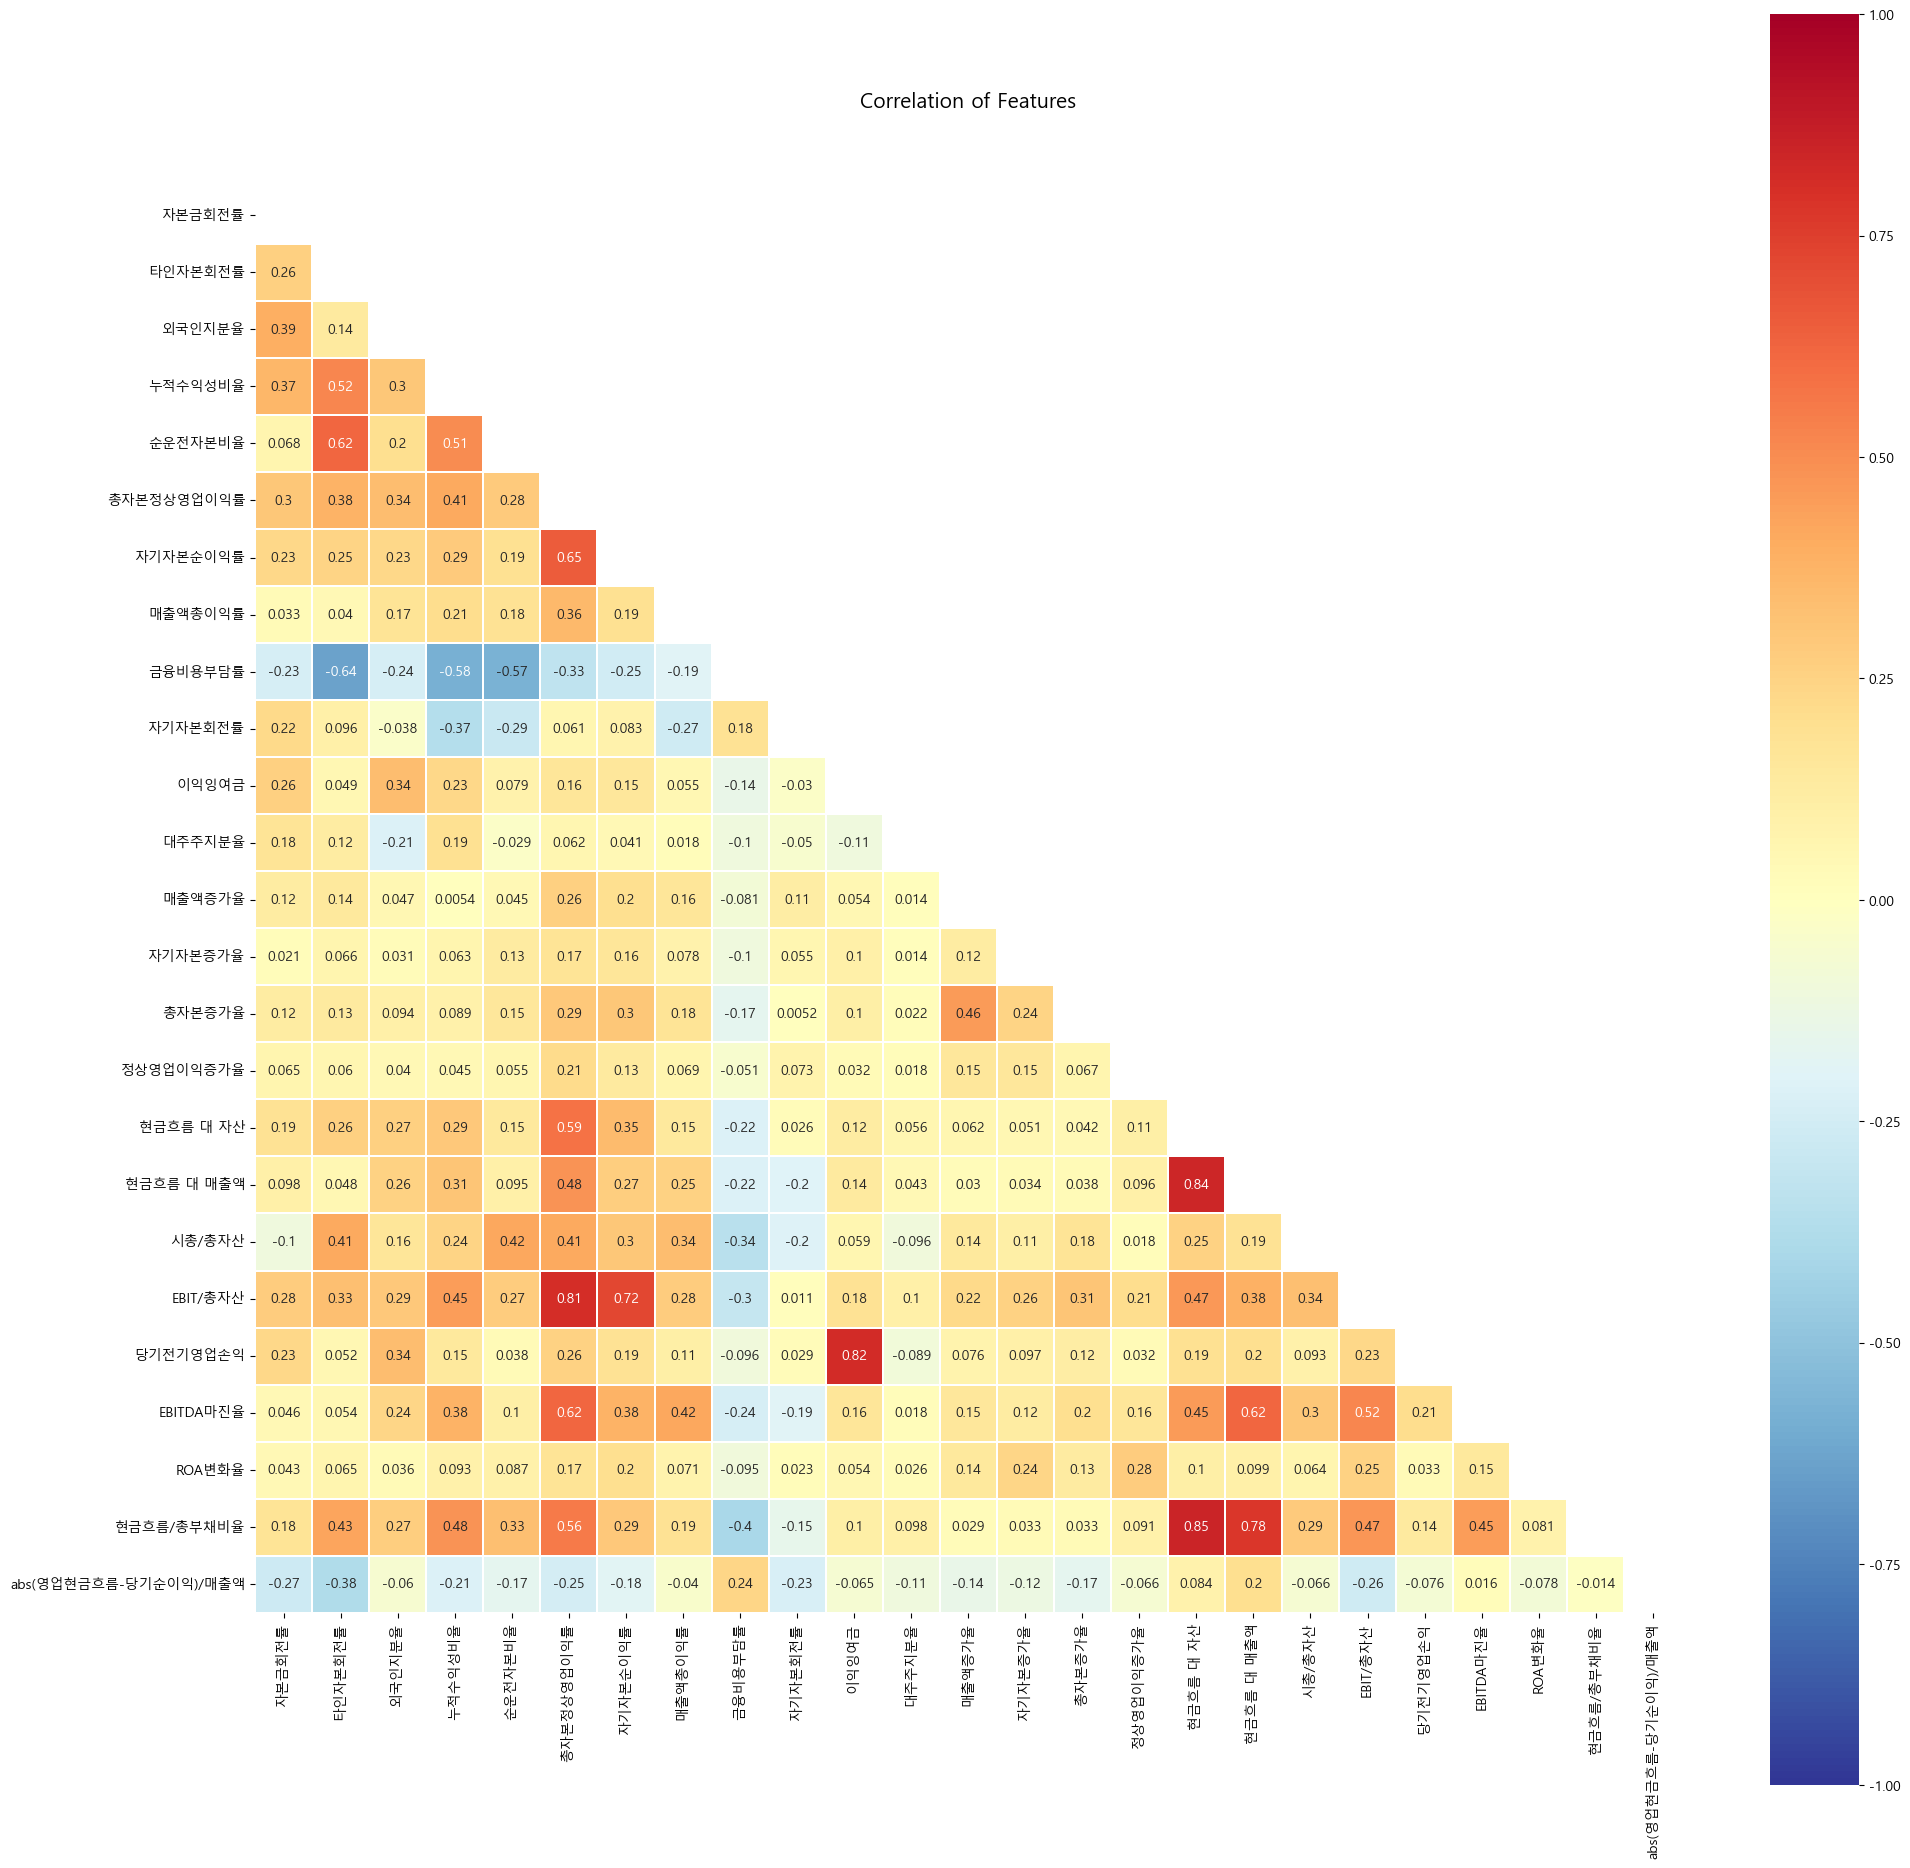

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colormap = plt.cm.hot

corr = 수치형_col.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(23, 23))
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family="Malgun Gothic")
plt.title("Correlation of Features", y=1.05, size=15)
sns.heatmap(corr, mask=mask, linewidths=0.1, vmax=1.0, vmin=-1.0, square=True,
            cmap='RdYlBu_r', linecolor="white", annot=True, annot_kws={'size': 10})

In [40]:
last_col = 명목형_col[0]+vif['features'].to_list()
last_col

['회사명',
 '거래소코드',
 '회계년도',
 '산업군',
 'target_1',
 'target_2',
 'target_3',
 '현금흐름 대 자산',
 '현금흐름 대 매출액',
 '현금흐름/총부채비율',
 '총자본정상영업이익률',
 'EBIT/총자산',
 '타인자본회전률',
 '이익잉여금',
 '당기전기영업손익',
 '누적수익성비율',
 'EBITDA마진율',
 '순운전자본비율',
 '자기자본순이익률',
 '금융비용부담률',
 '자기자본회전률',
 '자본금회전률',
 '시총/총자산',
 '외국인지분율',
 'abs(영업현금흐름-당기순이익)/매출액',
 '총자본증가율',
 '매출액총이익률',
 '매출액증가율',
 '대주주지분율',
 '자기자본증가율',
 'ROA변화율',
 '정상영업이익증가율']

In [41]:
train = train[last_col]
test = test[last_col]

In [42]:
train.to_csv('./datasets/통계검증완료/코스피_power_train.csv',encoding='utf-8-sig')
test.to_csv('./datasets/통계검증완료/코스피_power_test.csv',encoding='utf-8-sig')